**Guiding questions**


1.   Is the price of goods high/low such that the customers are not able to pay?
2.   How long does a customer/buyer takes to pay the money?


3.  Which mode of payment is used to pay?how much quantity is bought?

1.   In which location do we have the most people buying goods from?
2.   How many days are customers taking to collect their goods? what is affecting their delays?


6.   Does the selling price affect customers ability to buy goods?


7.   Which item is highly bought and why?












In [54]:
#Importing necessary libraries to manipulate our data set
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from matplotlib.font_manager import FontProperties
warnings.filterwarnings('ignore')

In [55]:
#Importing our dataset and reading the forst five rows
data= pd.read_csv("/content/Invoice_Query.csv",encoding='cp1252')
data.head(10)

,Unnamed: 0,Invoice Items.Created Time,Invoices.Invoice Date,Invoices.Last Payment Date,Invoices.Invoice Number,Customers.Customer ID,Customers.Customer Name,Customer Addresses.Billing Street,Customers.Mobile Phone,Invoices.Status,...,Customers.Location,Days in Collection,SELLING PRICE,Invoice Items.Total (BCY),Paid,Balance,UNIT COST,Total (COST),Sales Persons.Name,Sales Persons.Status
0,69,2022-08-04 14:54:55,04 Aug 2022,04 Aug 2022,INV-134981,143719000056422001,ola sheu agbabiaka,2 bada st,08179890685,PartiallyPaid,...,NaN,0.0,"NGN15,000.00",15000.0,500.0,14500.0,NaN,NaN,Gift Onyiyechi Udennya,Active
1,121,2022-08-04 12:25:55,04 Aug 2022,04 Aug 2022,INV-134976,143719000056401339,Oluwafemi Oladunjoye,1 Murtala Muhammed Drive,08037276012,Closed,...,Unit 32 – Victoria Island/Ikoyi/Oniru/Lekki Ph...,0.0,"NGN4,200.00",4200.0,4200.0,0.0,NaN,NaN,NaN,NaN
2,110,2022-08-04 16:36:24,03 Aug 2022,04 Aug 2022,INV-134983,143719000056307389,Chidinma David,no S339 tejuosho,08120890262,PartiallyPaid,...,NaN,1.0,"NGN15,000.00",15000.0,12000.0,3000.0,NaN,NaN,Gift Onyiyechi Udennya,Active
3,114,2022-08-04 11:21:48,03 Aug 2022,04 Aug 2022,INV-134973,143719000056275397,Omoola Abiodun,Line 11 owode onirin,08032225983,PartiallyPaid,...,Unit 29 – Owode Onirin,1.0,"NGN15,000.00",15000.0,4000.0,11000.0,NaN,NaN,Mariam Adebayo,Active
4,244,2022-08-04 11:19:34,03 Aug 2022,03 Aug 2022,INV-134972,143719000056275371,Olayinka Oseni,"10,yemisi Olatunji crescent Agric",09099196193,PartiallyPaid,...,Unit 27 – Ketu/Mile 12/Ikorodu/Ikosi/Offin,0.0,"NGN15,000.00",15000.0,2000.0,13000.0,NaN,NaN,Mariam Adebayo,Active
5,193,2022-08-03 10:36:30,02 Aug 2022,03 Aug 2022,INV-134705,143719000056160072,Idowu Ibrahim,Mobil owode,09050227609,PartiallyPaid,...,Unit 29 – Owode Onirin,1.0,"NGN15,000.00",15000.0,1500.0,13500.0,NaN,NaN,Mariam Adebayo,Active
6,118,2022-08-02 15:56:00,01 Aug 2022,04 Aug 2022,INV-134473,143719000056158819,Chibuzor Everest,Check point,07068827495,PartiallyPaid,...,Unit 29 – Owode Onirin,3.0,"NGN65,000.00",65000.0,13000.0,52000.0,NaN,NaN,Doubra Ebun,Active
7,149,2022-08-02 13:19:26,01 Aug 2022,04 Aug 2022,INV-134463,143719000056103752,Abosede Odanye,"11,mosholashi street",08138393943,PartiallyPaid,...,Unit 34 – Obalende/Sura/Lagos Island/Agarawu/B...,3.0,"NGN15,000.00",15000.0,5000.0,10000.0,NaN,NaN,Idowu Ottun,Active
8,364,2022-08-02 10:00:56,02 Aug 2022,02 Aug 2022,INV-134455,143719000056103559,Ismail Babatunde,"17, mosholashi street",07086270180,PartiallyPaid,...,Unit 34 – Obalende/Sura/Lagos Island/Agarawu/B...,0.0,"NGN15,000.00",15000.0,1000.0,14000.0,NaN,NaN,NaN,NaN
9,91,2022-08-04 14:58:54,04 Aug 2022,04 Aug 2022,INV-134982,143719000056089934,Ugochi ojini,no s 326,07045093207,PartiallyPaid,...,Unit 17 - Surulere/Itire/Yaba/Ebute Metta/Oyin...,0.0,"NGN26,000.00",26000.0,500.0,25500.0,NaN,NaN,Gift Onyiyechi Udennya,Active


In [56]:
#We want to understand our dataset
#we have 24203 rows and 25 columns
data.shape

(24203, 25)

In [57]:
#We want to get the statistics of our data
data.describe()

,Unnamed: 0,Customers.Customer ID,Inventory Adjustment Items.Price (BCY),Days in Collection,Invoice Items.Total (BCY),Paid,Balance,UNIT COST,Total (COST)
count,24203.000000,2.420300e+04,4986.000000,15259.000000,2.420300e+04,2.420300e+04,24203.000000,4986.000000,4.986000e+03
mean,12102.000000,1.437190e+17,14504.534062,41.088407,1.801361e+04,1.044965e+04,7563.959137,14504.534062,1.668907e+04
std,6986.948619,1.255736e+07,8136.394955,59.121133,1.074945e+05,1.075990e+05,11023.784469,8136.394955,5.275935e+04
min,1.000000,1.437190e+17,0.000000,-135.000000,1.800000e+02,-1.500000e+04,0.000000,0.000000,0.000000e+00
25%,6051.500000,1.437190e+17,10881.960000,5.000000,9.000000e+03,0.000000e+00,0.000000,10881.960000,1.119800e+04
50%,12102.000000,1.437190e+17,14581.540000,25.000000,1.500000e+04,7.500000e+03,0.000000,14581.540000,1.468500e+04
75%,18152.500000,1.437190e+17,15431.000000,53.000000,1.500000e+04,1.500000e+04,15000.000000,15431.000000,1.570100e+04
max,24203.000000,1.437190e+17,87311.790000,741.000000,1.048520e+07,1.048520e+07,65000.000000,87311.790000,3.244058e+06


In [58]:
#we want to see the 25 columns present in our dataset
data.columns

Index(['Unnamed: 0', 'Invoice Items.Created Time', 'Invoices.Invoice Date',
       'Invoices.Last Payment Date', 'Invoices.Invoice Number',
       'Customers.Customer ID', 'Customers.Customer Name',
       'Customer Addresses.Billing Street', 'Customers.Mobile Phone',
       'Invoices.Status', 'Invoice Items.Item Name', 'Invoice Items.Quantity',
       'Inventory Adjustment Items.Price (BCY)',
       'Customer Addresses.Shipping City', 'Customers.Hub and Field Office',
       'Customers.Location', 'Days in Collection', 'SELLING PRICE',
       'Invoice Items.Total (BCY)', 'Paid', 'Balance', 'UNIT COST',
       'Total (COST)', 'Sales Persons.Name', 'Sales Persons.Status'],
      dtype='object')

In [59]:
#We want to look at the unqiue values in each column
data.nunique()

Unnamed: 0                                24203
Invoice Items.Created Time                19258
Invoices.Invoice Date                       967
Invoices.Last Payment Date                  884
Invoices.Invoice Number                   19263
Customers.Customer ID                      7154
Customers.Customer Name                    7141
Customer Addresses.Billing Street          6042
Customers.Mobile Phone                     6888
Invoices.Status                               5
Invoice Items.Item Name                      35
Invoice Items.Quantity                       28
Inventory Adjustment Items.Price (BCY)      293
Customer Addresses.Shipping City            539
Customers.Hub and Field Office                8
Customers.Location                           40
Days in Collection                          418
SELLING PRICE                                33
Invoice Items.Total (BCY)                    60
Paid                                        238
Balance                                 

In [60]:
#We want to get the unique values in column 
data["Invoice Items.Created Time"].unique()

array(['2022-08-04 14:54:55', '2022-08-04 12:25:55',
       '2022-08-04 16:36:24', ..., '2022-07-02 22:28:01',
       '2022-07-07 14:15:47', '2020-04-27 17:42:26'], dtype=object)

In [61]:
#Checking the number of null values
data.isnull().sum()

Unnamed: 0                                    0
Invoice Items.Created Time                    0
Invoices.Invoice Date                         0
Invoices.Last Payment Date                 8944
Invoices.Invoice Number                       0
Customers.Customer ID                         0
Customers.Customer Name                       0
Customer Addresses.Billing Street           122
Customers.Mobile Phone                      287
Invoices.Status                               0
Invoice Items.Item Name                       5
Invoice Items.Quantity                        0
Inventory Adjustment Items.Price (BCY)    19217
Customer Addresses.Shipping City            332
Customers.Hub and Field Office              609
Customers.Location                          868
Days in Collection                         8944
SELLING PRICE                                 0
Invoice Items.Total (BCY)                     0
Paid                                          0
Balance                                 

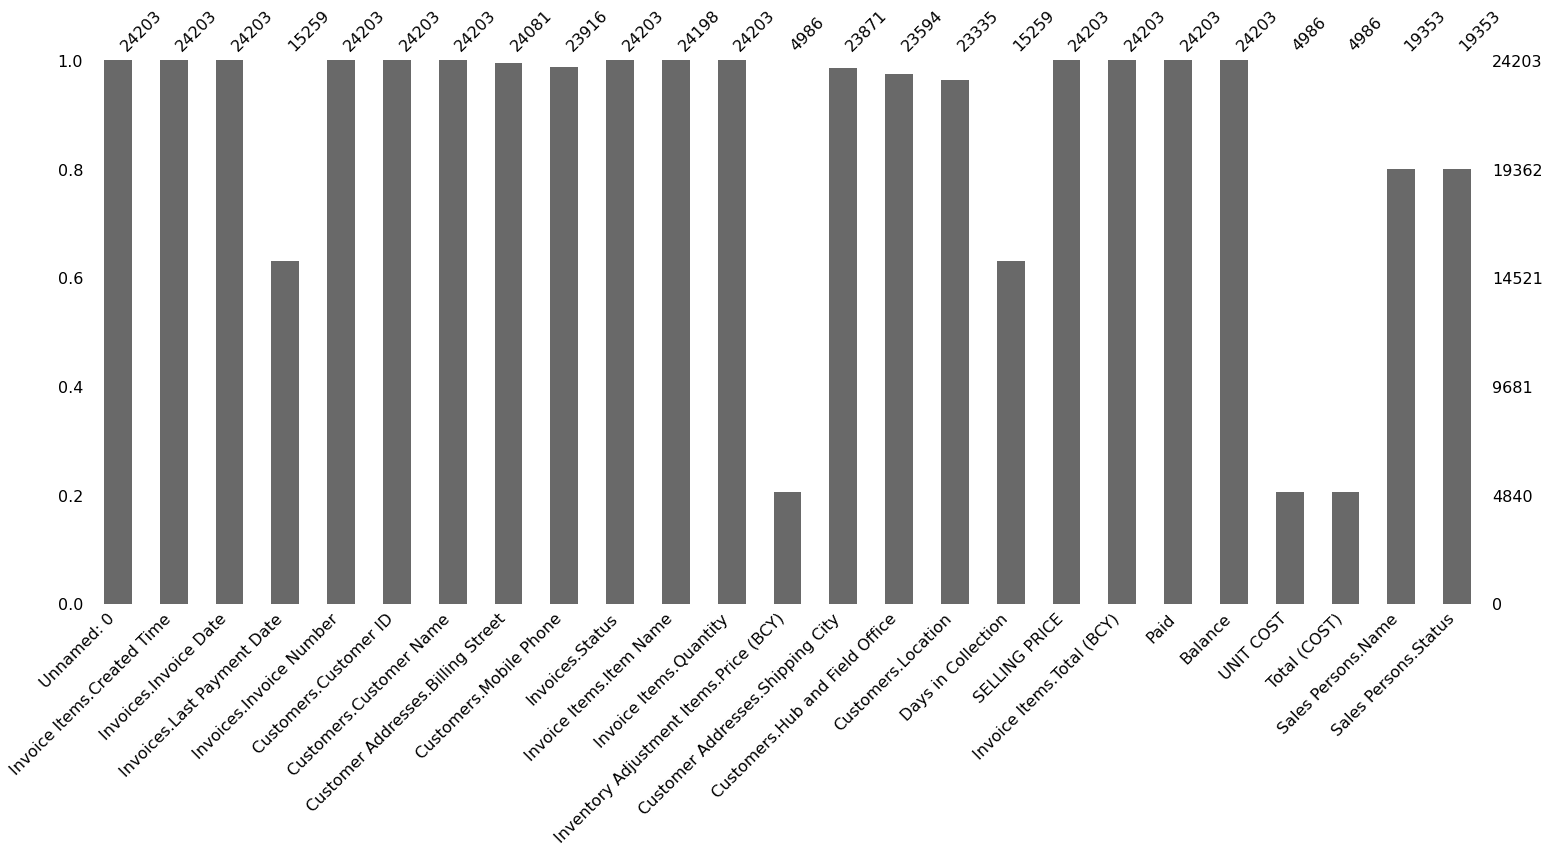

In [62]:
#We want to drop columns which has >99% missing data
msno.bar(data)

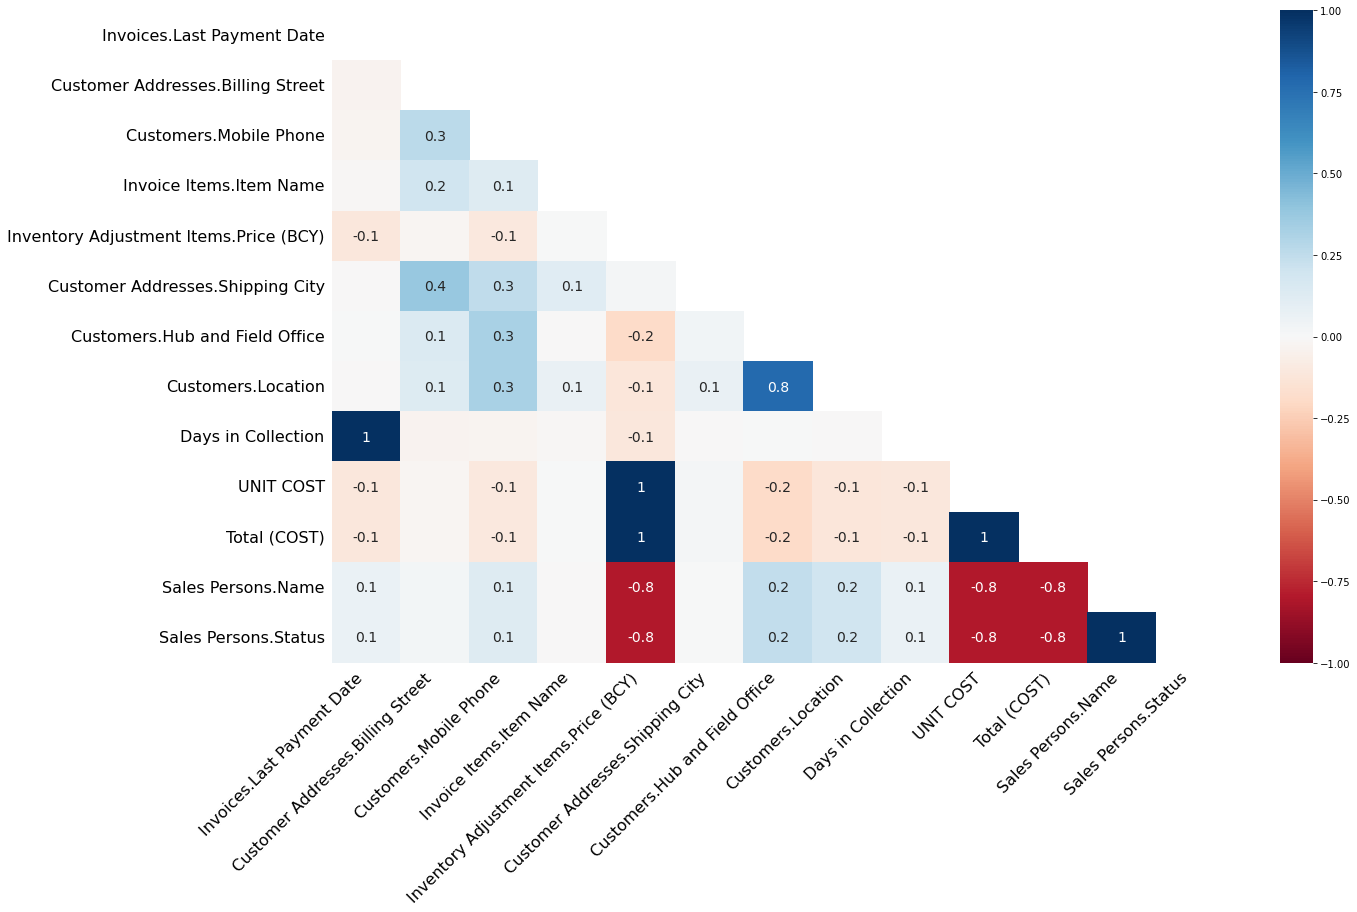

In [63]:
#But before we drop the columns we would like to know whether there is a corelation between them
#we can see there's is a weak corelation between salesperson name ,status and unit cost
msno.heatmap(data)

In [64]:
#We want to check whether unit cost and total cost are the same
#We can conclude that those two rows are not repetitive
print('UNIT COST and Total(COST) are equal: ' ,data['UNIT COST'].equals(data['Total (COST)']))


UNIT COST and Total(COST) are equal:  False


In [65]:
#We can check what the unit cost,Inventory Adjustment Items.Price (BCY) and total cost columns contain to further understand them
data['UNIT COST'],data['Total (COST)'],data["Inventory Adjustment Items.Price (BCY)"]

(0       NaN
 1       NaN
 2       NaN
 3       NaN
 4       NaN
          ..
 24198   NaN
 24199   NaN
 24200   NaN
 24201   NaN
 24202   NaN
 Name: UNIT COST, Length: 24203, dtype: float64, 0       NaN
 1       NaN
 2       NaN
 3       NaN
 4       NaN
          ..
 24198   NaN
 24199   NaN
 24200   NaN
 24201   NaN
 24202   NaN
 Name: Total (COST), Length: 24203, dtype: float64, 0       NaN
 1       NaN
 2       NaN
 3       NaN
 4       NaN
          ..
 24198   NaN
 24199   NaN
 24200   NaN
 24201   NaN
 24202   NaN
 Name: Inventory Adjustment Items.Price (BCY), Length: 24203, dtype: float64)

In [66]:
#From our guiding questions we can drop the columns we do not require to come up with a conclusion
new_data=data.drop(["UNIT COST","Total (COST)","Unnamed: 0","Customer Addresses.Billing Street","Customers.Mobile Phone","Inventory Adjustment Items.Price (BCY)"],axis=1)
new_data

,Invoice Items.Created Time,Invoices.Invoice Date,Invoices.Last Payment Date,Invoices.Invoice Number,Customers.Customer ID,Customers.Customer Name,Invoices.Status,Invoice Items.Item Name,Invoice Items.Quantity,Customer Addresses.Shipping City,Customers.Hub and Field Office,Customers.Location,Days in Collection,SELLING PRICE,Invoice Items.Total (BCY),Paid,Balance,Sales Persons.Name,Sales Persons.Status
0,2022-08-04 14:54:55,04 Aug 2022,04 Aug 2022,INV-134981,143719000056422001,ola sheu agbabiaka,PartiallyPaid,Silver Basket,NGN1.00,mushin,NaN,NaN,0.0,"NGN15,000.00",15000.0,500.0,14500.0,Gift Onyiyechi Udennya,Active
1,2022-08-04 12:25:55,04 Aug 2022,04 Aug 2022,INV-134976,143719000056401339,Oluwafemi Oladunjoye,Closed,Tomato Jos,NGN1.00,Ikoyi,Branch 7 - Lagos Island Centre,Unit 32 – Victoria Island/Ikoyi/Oniru/Lekki Ph...,0.0,"NGN4,200.00",4200.0,4200.0,0.0,NaN,NaN
2,2022-08-04 16:36:24,03 Aug 2022,04 Aug 2022,INV-134983,143719000056307389,Chidinma David,PartiallyPaid,Silver Basket,NGN1.00,Yaba,NaN,NaN,1.0,"NGN15,000.00",15000.0,12000.0,3000.0,Gift Onyiyechi Udennya,Active
3,2022-08-04 11:21:48,03 Aug 2022,04 Aug 2022,INV-134973,143719000056275397,Omoola Abiodun,PartiallyPaid,Silver Basket,NGN1.00,ikorodu,Branch 6 - Ikorodu Centre,Unit 29 – Owode Onirin,1.0,"NGN15,000.00",15000.0,4000.0,11000.0,Mariam Adebayo,Active
4,2022-08-04 11:19:34,03 Aug 2022,03 Aug 2022,INV-134972,143719000056275371,Olayinka Oseni,PartiallyPaid,Silver Basket,NGN1.00,Ikorodu,Branch 6 - Ikorodu Centre,Unit 27 – Ketu/Mile 12/Ikorodu/Ikosi/Offin,0.0,"NGN15,000.00",15000.0,2000.0,13000.0,Mariam Adebayo,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24198,2020-03-29 16:29:15,29 Mar 2020,29 Mar 2020,INV-008726,143719000006820021,Mrs. Naomi Smith,Closed,Bronze Basket,NGN9.00,Lekki,Branch 7 - Lagos Island Centre,Unit 31 – Jakande Estate Lekki/Igboefon/Osapa,0.0,"NGN7,500.00",67500.0,67500.0,0.0,Lanre Smith,Active
24199,2020-03-29 16:30:51,29 Mar 2020,29 Mar 2020,INV-008727,143719000006820021,Mrs. Naomi Smith,Closed,Gold Basket,NGN4.00,Lekki,Branch 7 - Lagos Island Centre,Unit 31 – Jakande Estate Lekki/Igboefon/Osapa,0.0,"NGN22,000.00",88000.0,88000.0,0.0,Lanre Smith,Active
24200,2022-07-02 22:28:01,07 Jun 2022,07 Jun 2022,INV-126593,143719000001124003,Providus Bank PLC,Closed,Rice 50,NGN250.00,Victoria Island,NaN,NaN,0.0,"NGN26,000.00",6500000.0,6500000.0,0.0,Lanre Smith,Active
24201,2022-07-07 14:15:47,30 Jun 2022,30 Jun 2022,INV-127869,143719000001124003,Providus Bank PLC,Closed,Rice 50,"NGN14,000.00",Victoria Island,NaN,NaN,0.0,NGN640.00,8960000.0,8960000.0,0.0,Lanre Smith,Active


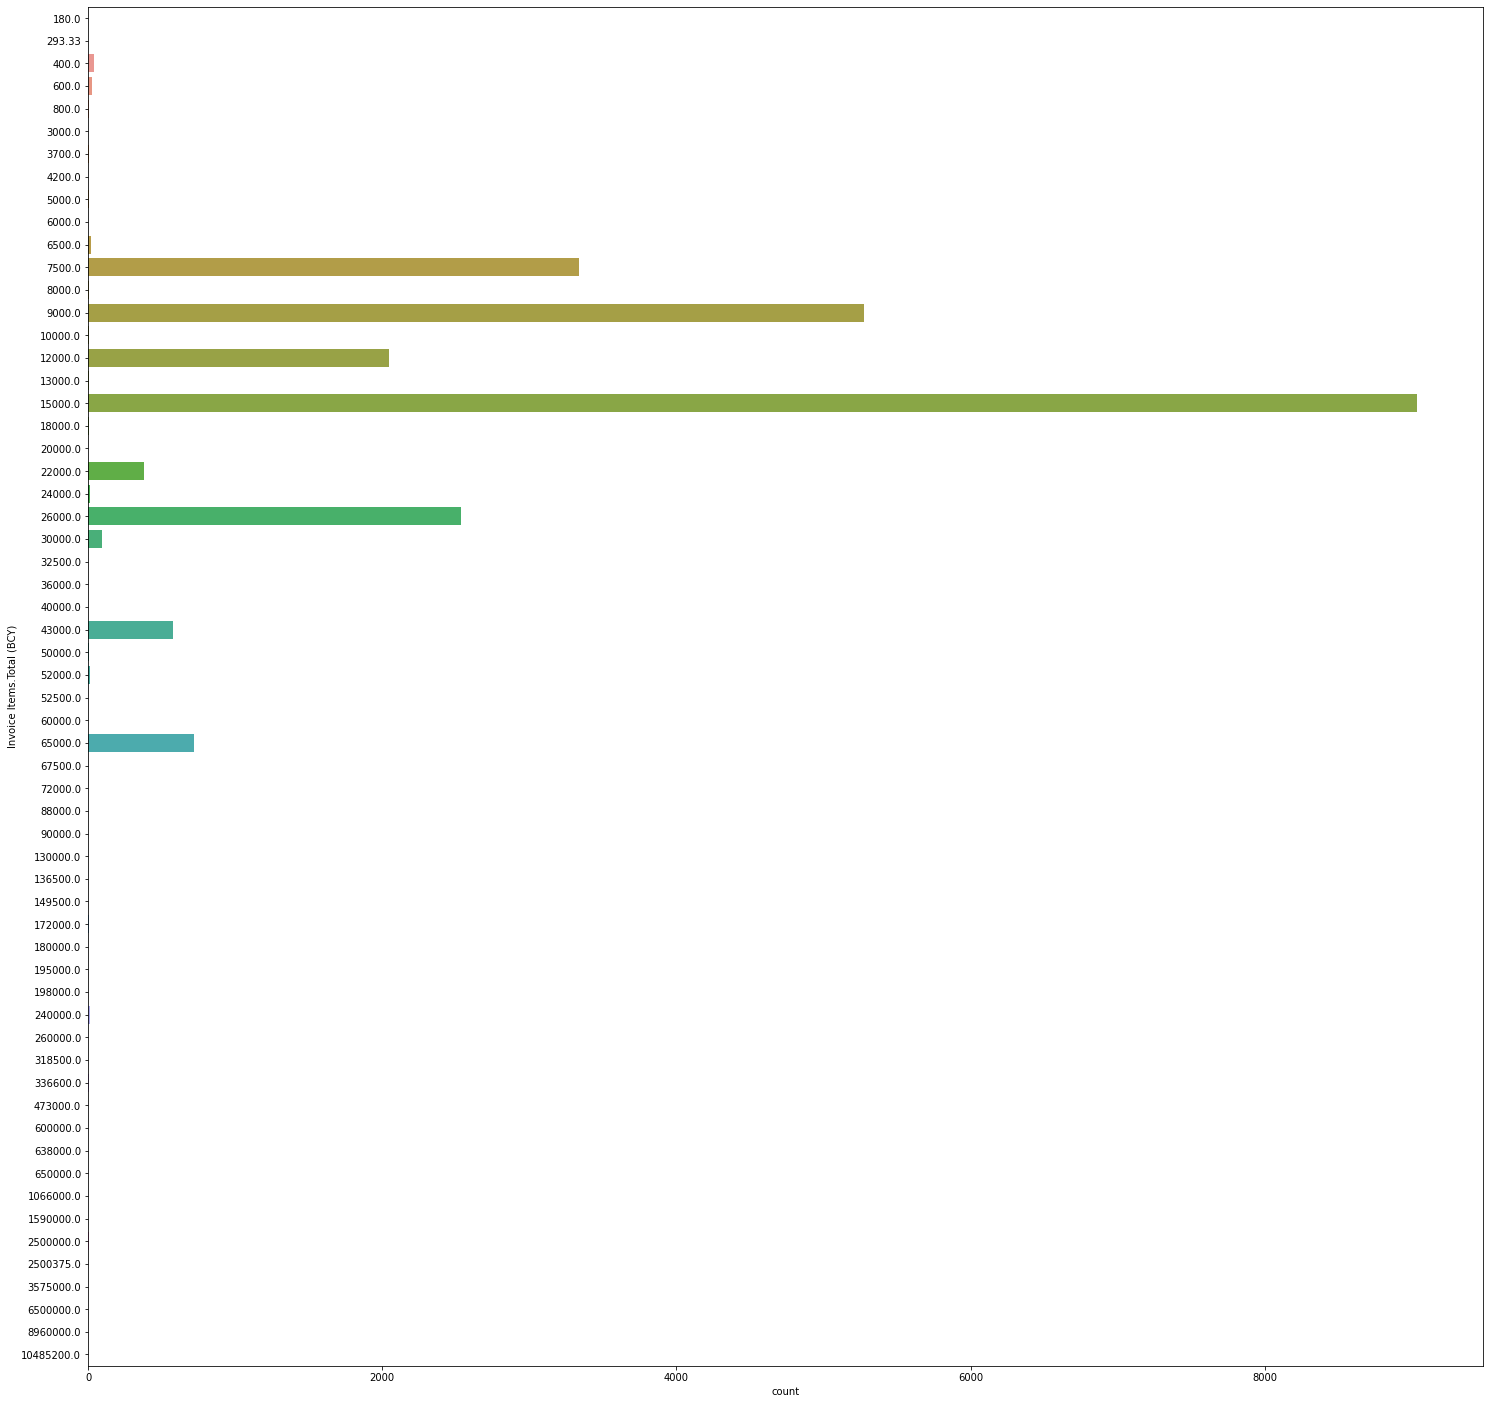

In [99]:
#Is the price of goods high/low such that the customers are not able to pay?
sns.countplot(y="Invoice Items.Total (BCY)",data=new_data)
#Lets resize our figure for more visibility
plt.rcParams["figure.figsize"] = (70,60)

#considering the invoice items total we can see that items worth between  7500 and 15000 are the most affordable by customers compared 
#with items worth 22000 which have less than 2000 customers.

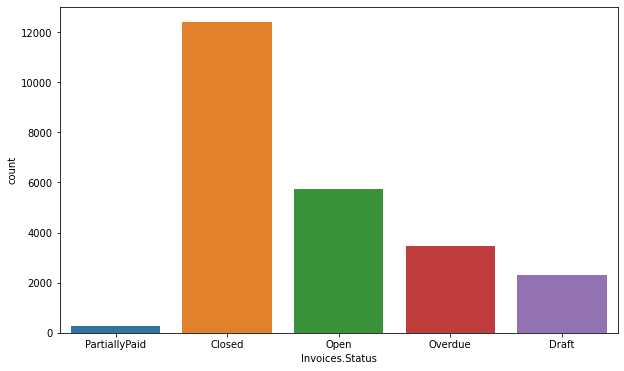

In [70]:
#Also we can have a look at the invoice status which should communicate of how fully the customers pay the invoice
sns.countplot(x="Invoices.Status",data=new_data)
#Lets resize the figure for good visibility
plt.rcParams["figure.figsize"] = (10,6)

#We can clearly see that more people are able to clear their invoices on time as compared to those whose invoce are overdue.
#But then we can se that the people with overdue are more compared to those who have partiallypaid? what could be the reason for this? 


Text(0.5, 0, 'Invoices')

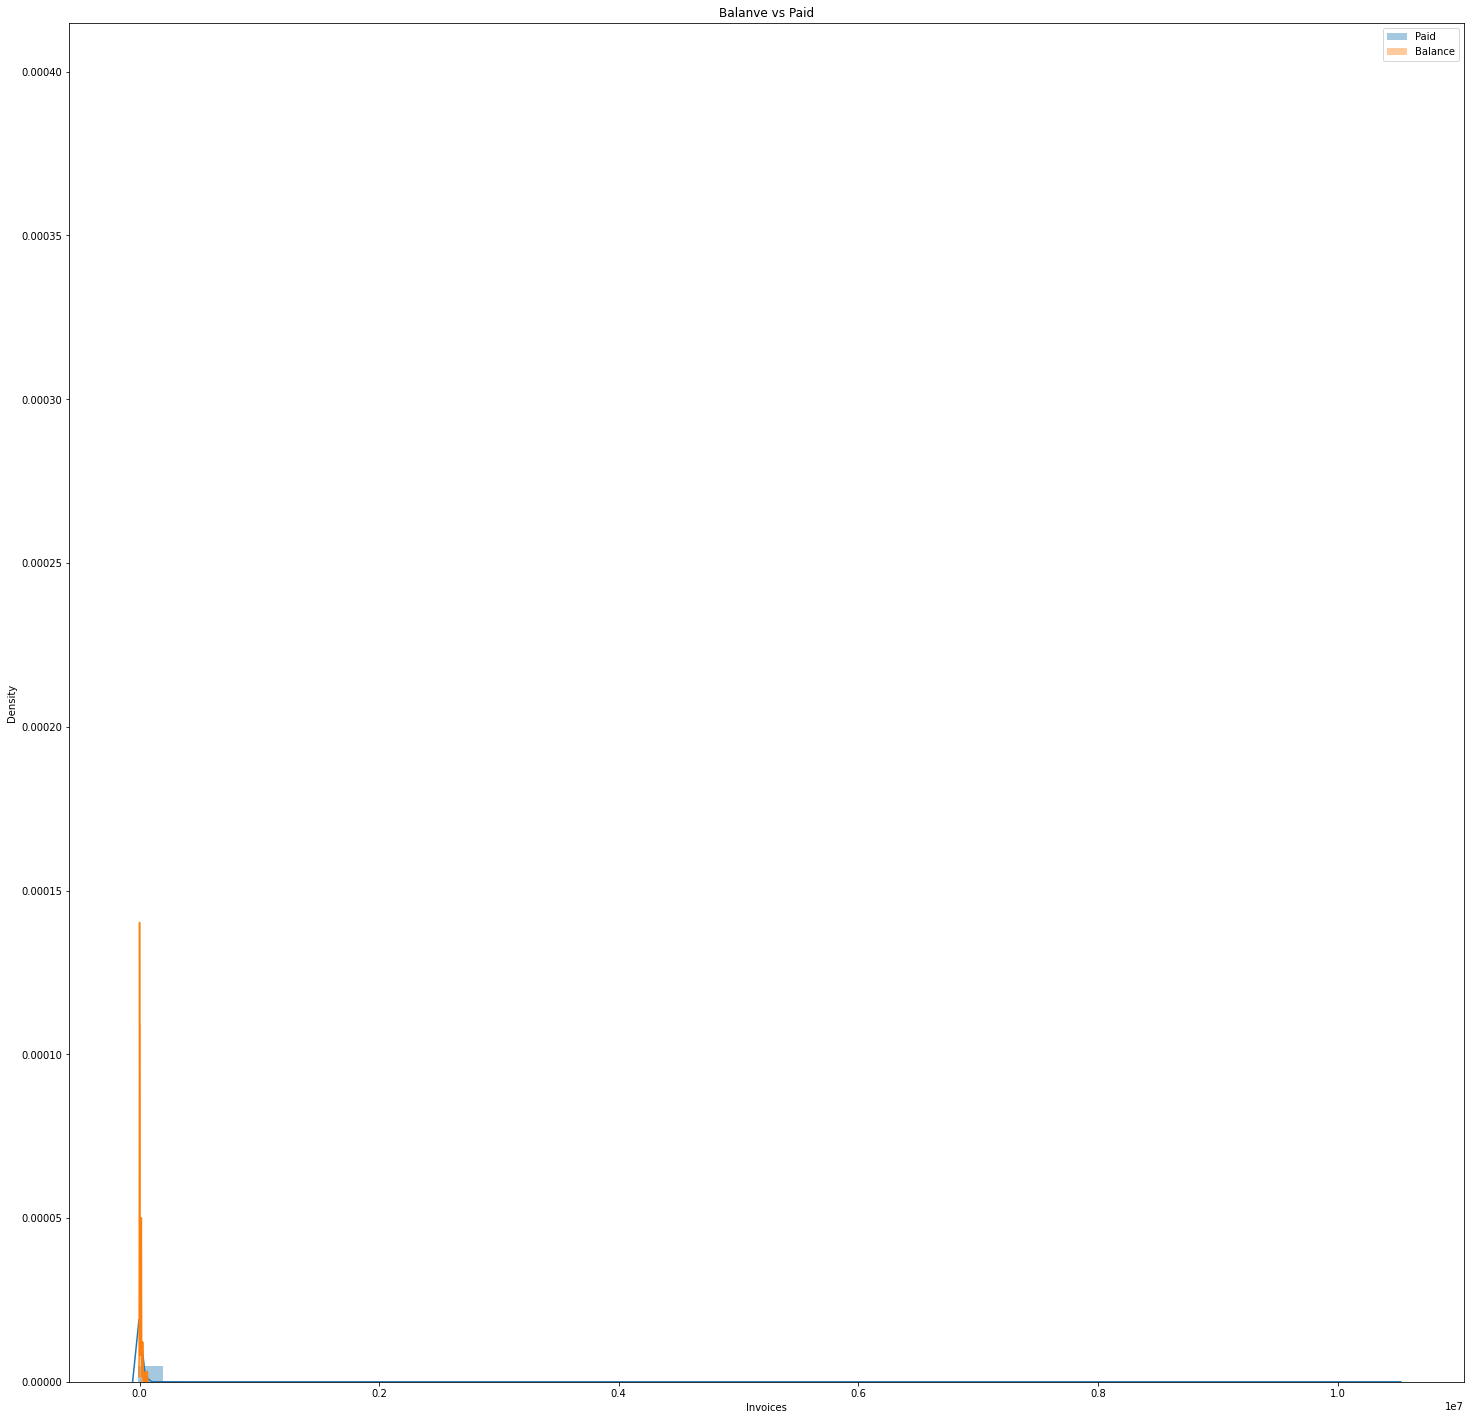

In [90]:
#Lets resize our figure for more visibility
plt.rcParams["figure.figsize"] = (25,25)

#How long does a customer/buyer takes to pay the money?
sns.distplot(new_data["Paid"],label="Paid")
sns.distplot(new_data["Balance"],label="Balance")
plt.legend()
plt.title("Balanve vs Paid")
plt.xlabel("Invoices")

#From this we can see that the number of paid invoices are way more than the number of balance.

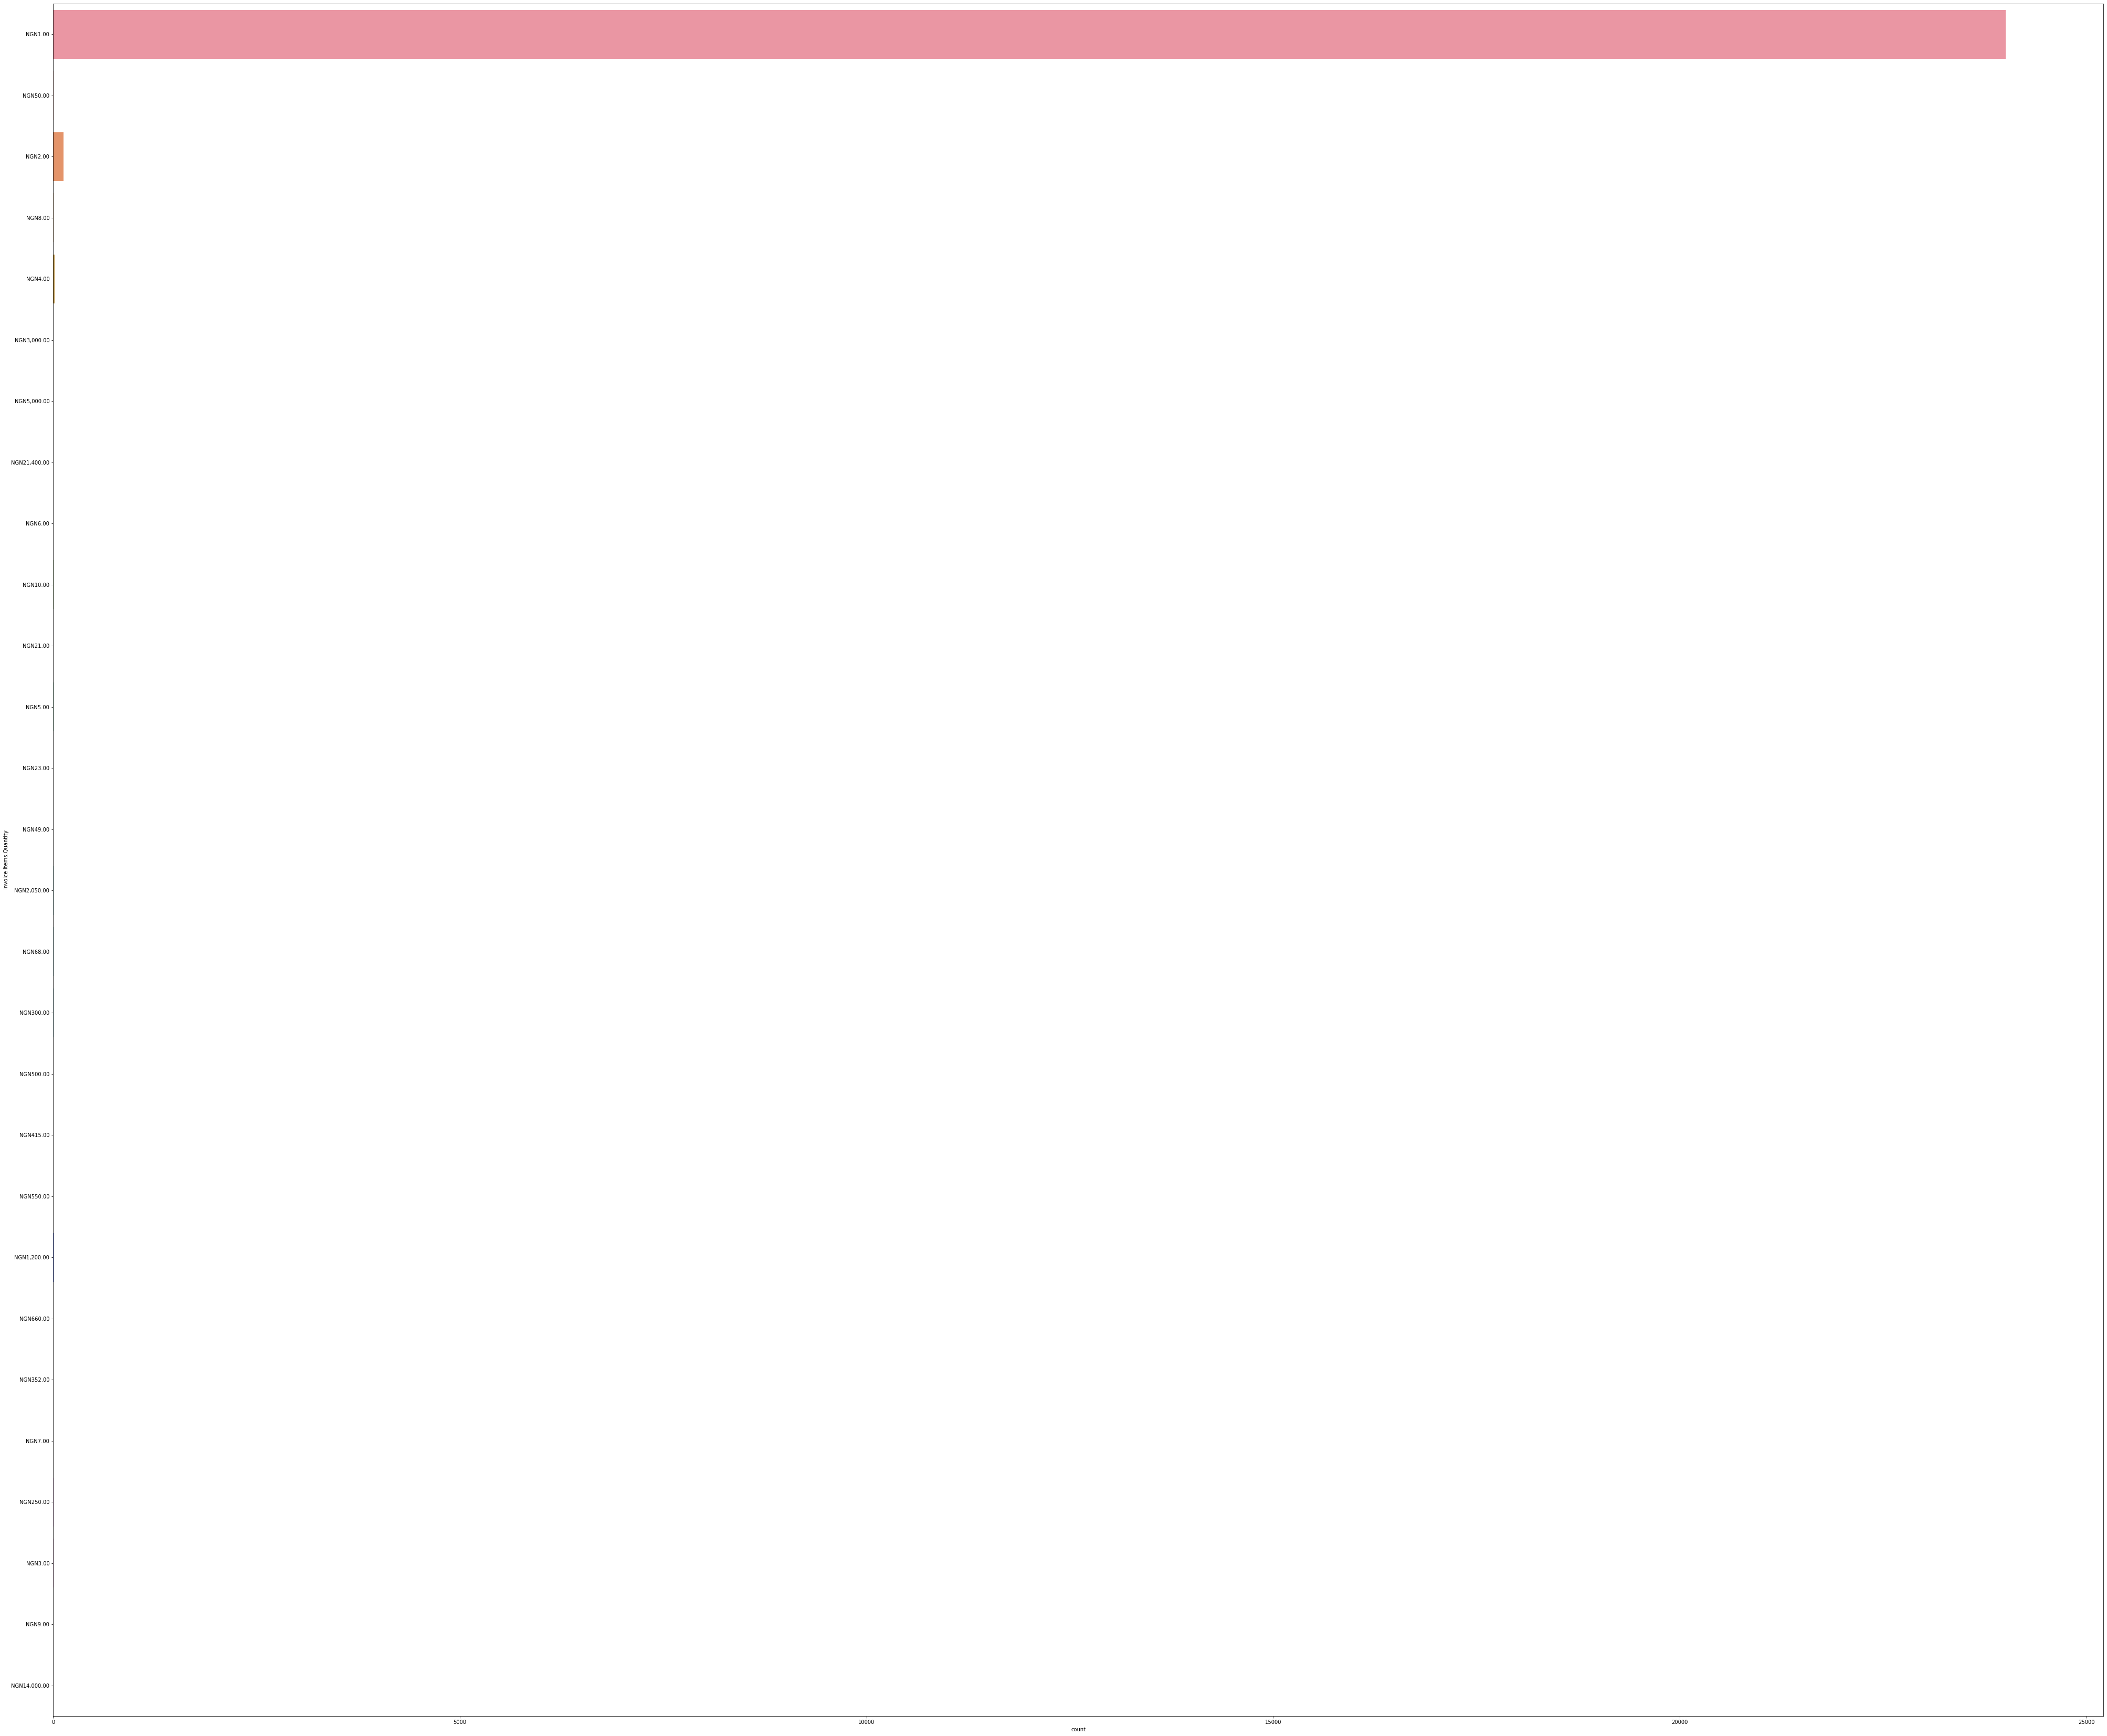

In [100]:
#Which mode of payment is used to pay?how much quantity is bought?
#The only mode used is through the nigerian naira
sns.countplot(y="Invoice Items.Quantity",data=new_data)

#We can see that customers buy one item from the shop as compared to those who buy two items

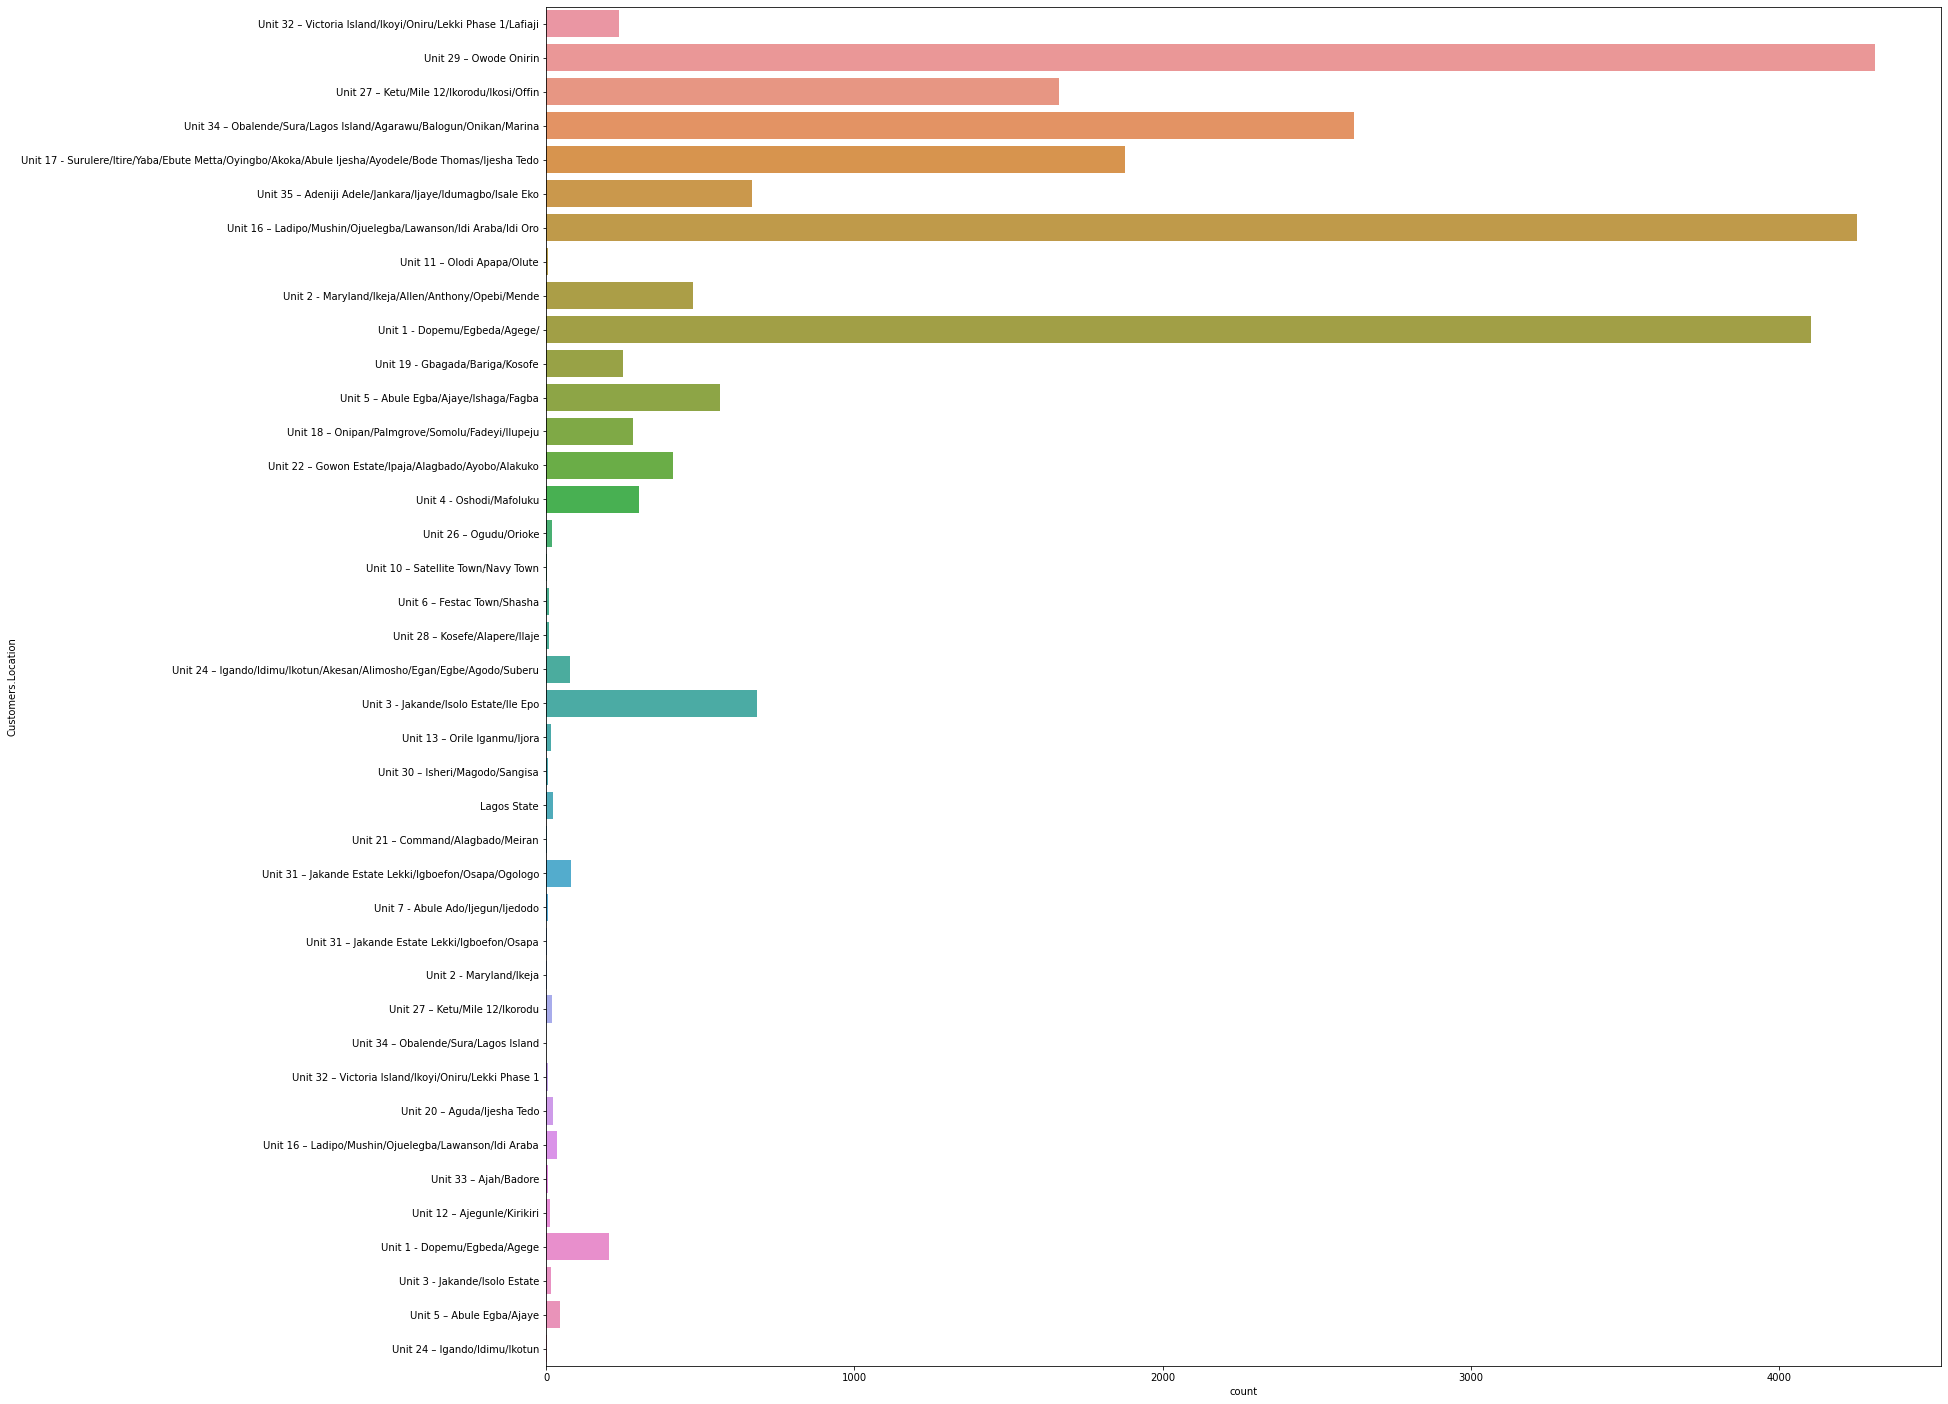

In [98]:
#In which location do we have the most people buying goods from?
sns.countplot(y="Customers.Location",data=new_data)

#We can see that most of the invoices are from Unit 29 – Owode Onirin and the least was from unit 30-isherMagodo

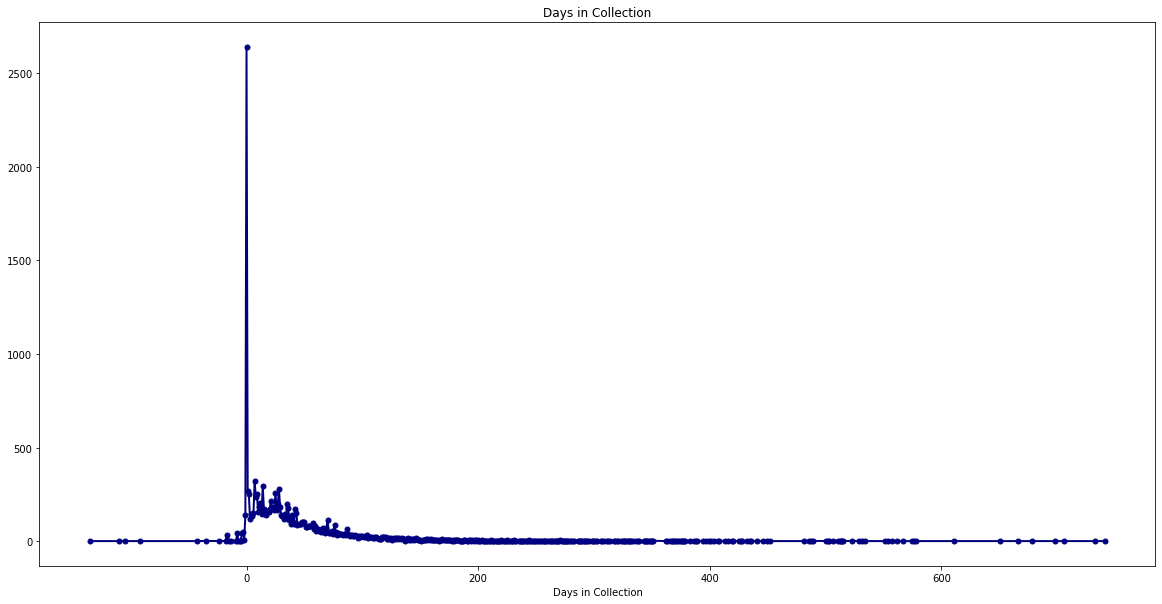

In [108]:
#How many days are customers taking to collect their goods? what is affecting their delays?
#sns.countplot(x="Days in Collection",data=new_data)
data.groupby('Days in Collection')['Days in Collection'].count().plot(kind='line',title='Days in Collection',figsize=(20,10),lw=2,colormap='jet',marker='.',markersize=10)

#We can see that there were no delays in invoice collection

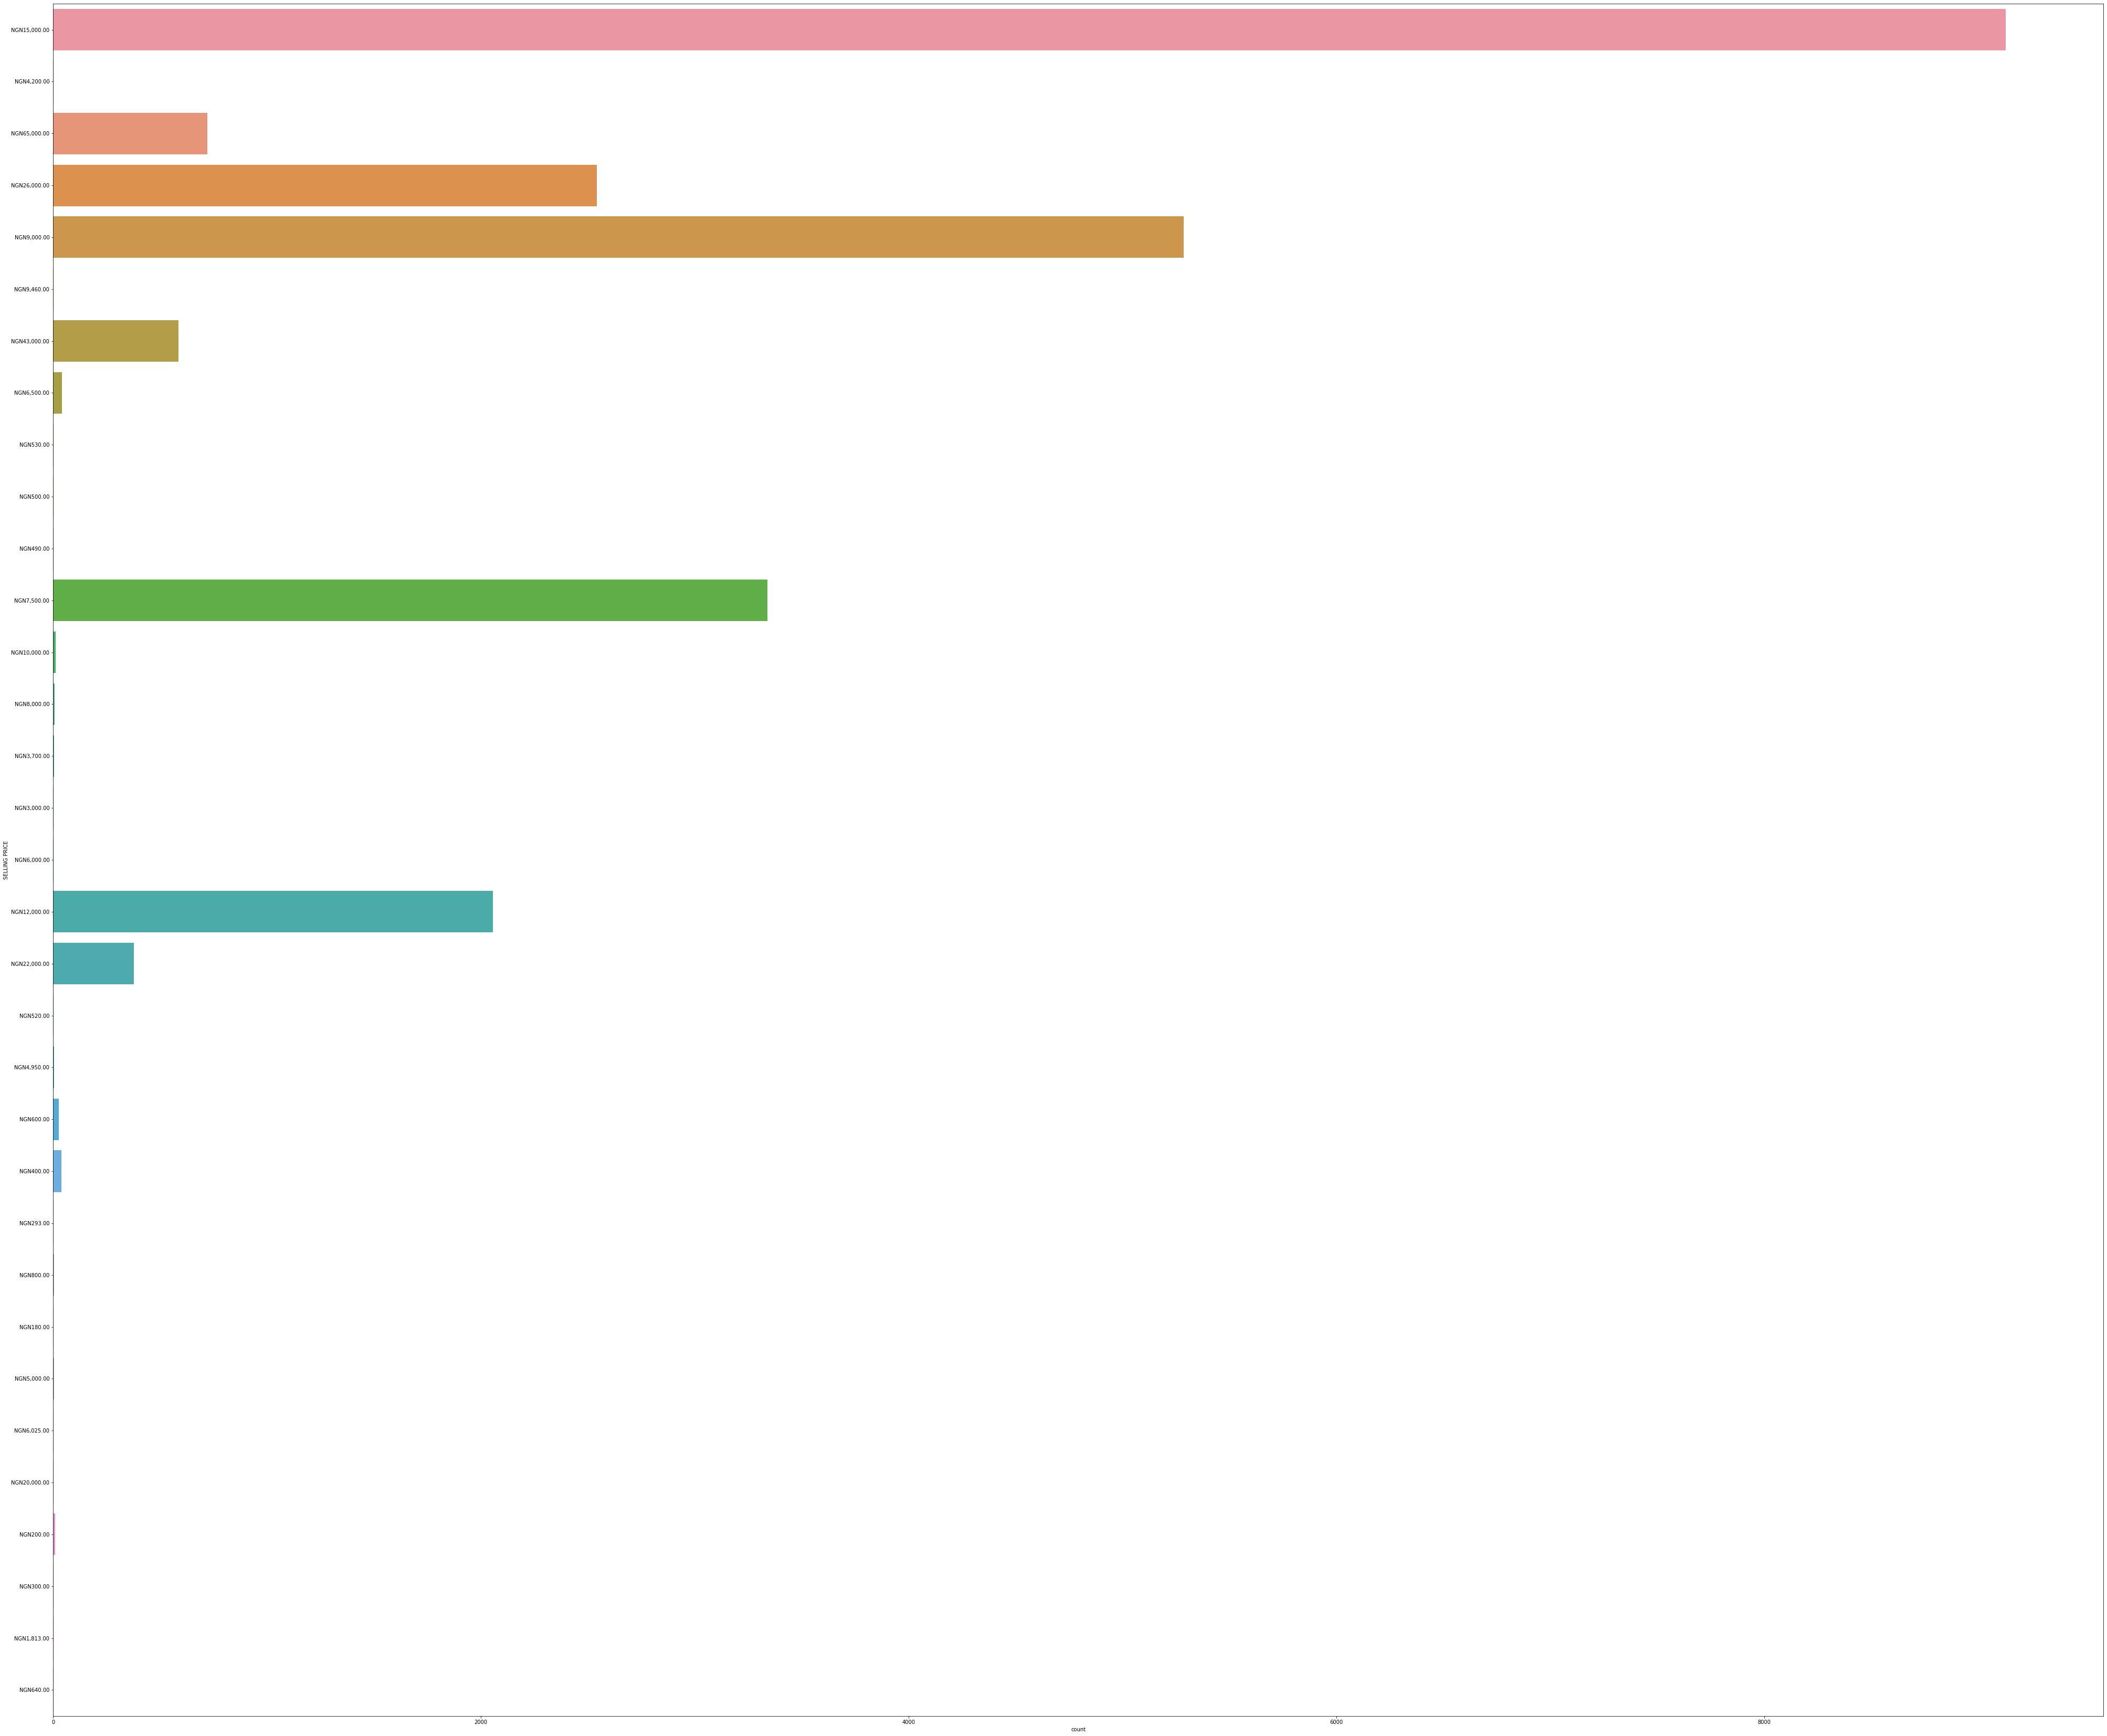

In [113]:
#Does the selling price affect customers ability to buy goods?
sns.countplot(y="SELLING PRICE",data=new_data)

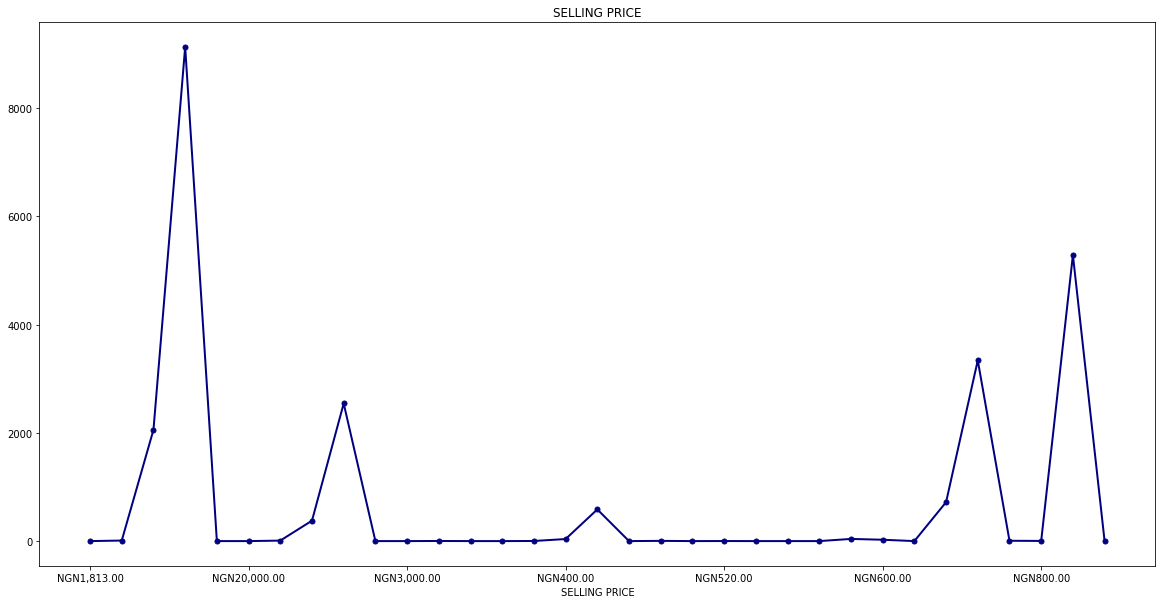

In [115]:
#Lets visualize the selling price in a line graph
data.groupby('SELLING PRICE')['SELLING PRICE'].count().plot(kind='line',title='SELLING PRICE',figsize=(20,10),lw=2,colormap='jet',marker='.',markersize=10)

In [114]:
#We can see that the selling price is kinda distributed such that it is not conclusive to say that the lower the selling price the higher the number of people who buy that item.
new_data["SELLING PRICE"].value_counts()

NGN15,000.00    9130
NGN9,000.00     5285
NGN7,500.00     3340
NGN26,000.00    2543
NGN12,000.00    2056
NGN65,000.00     720
NGN43,000.00     586
NGN22,000.00     378
NGN6,500.00       41
NGN400.00         39
NGN600.00         26
NGN10,000.00      11
NGN200.00         10
NGN8,000.00        7
NGN5,000.00        5
NGN800.00          4
NGN3,700.00        3
NGN4,950.00        3
NGN520.00          2
NGN6,025.00        1
NGN20,000.00       1
NGN300.00          1
NGN1,813.00        1
NGN180.00          1
NGN6,000.00        1
NGN293.00          1
NGN4,200.00        1
NGN3,000.00        1
NGN490.00          1
NGN500.00          1
NGN530.00          1
NGN9,460.00        1
NGN640.00          1
Name: SELLING PRICE, dtype: int64

In [116]:
#Which item is highly bought and why?
new_data["Invoice Items.Item Name"].value_counts()

Bronze Basket              8288
Silver Basket              7612
SILVER BASKET 4.0          3375
Gold Basket                2098
GOLD BASKET 4.0             816
Platinum Basket             718
Diamond Basket              375
BRONZE 4.0                  324
DIAMOND BASKET 3.0          205
SILVER BASKET 3.0           186
Delivery Charge Bronze       43
Delivery Charge Silver       27
Ruby Basket                  22
RUBY BASKET                  20
Silver Basket 2.0            10
Rice- Local/Par Boiled       10
Bronze Basket 2.0            10
Gold Basket 2.0               6
Diamond Basket 2.0            6
Green Bundle                  6
Relief Basket 2               5
Rice 50                       5
Releif Basket 1               5
Pearl Basket                  4
Rice-Foreign/Par Boiled       4
Delivery Charge Gold          4
Yellow Bundle                 3
Vegetable Oil - 5Ltr          3
Platinum Basket 2.0           2
Delivery Charge Ruby          1
Bulk Semo 1KG                 1
Beans - 

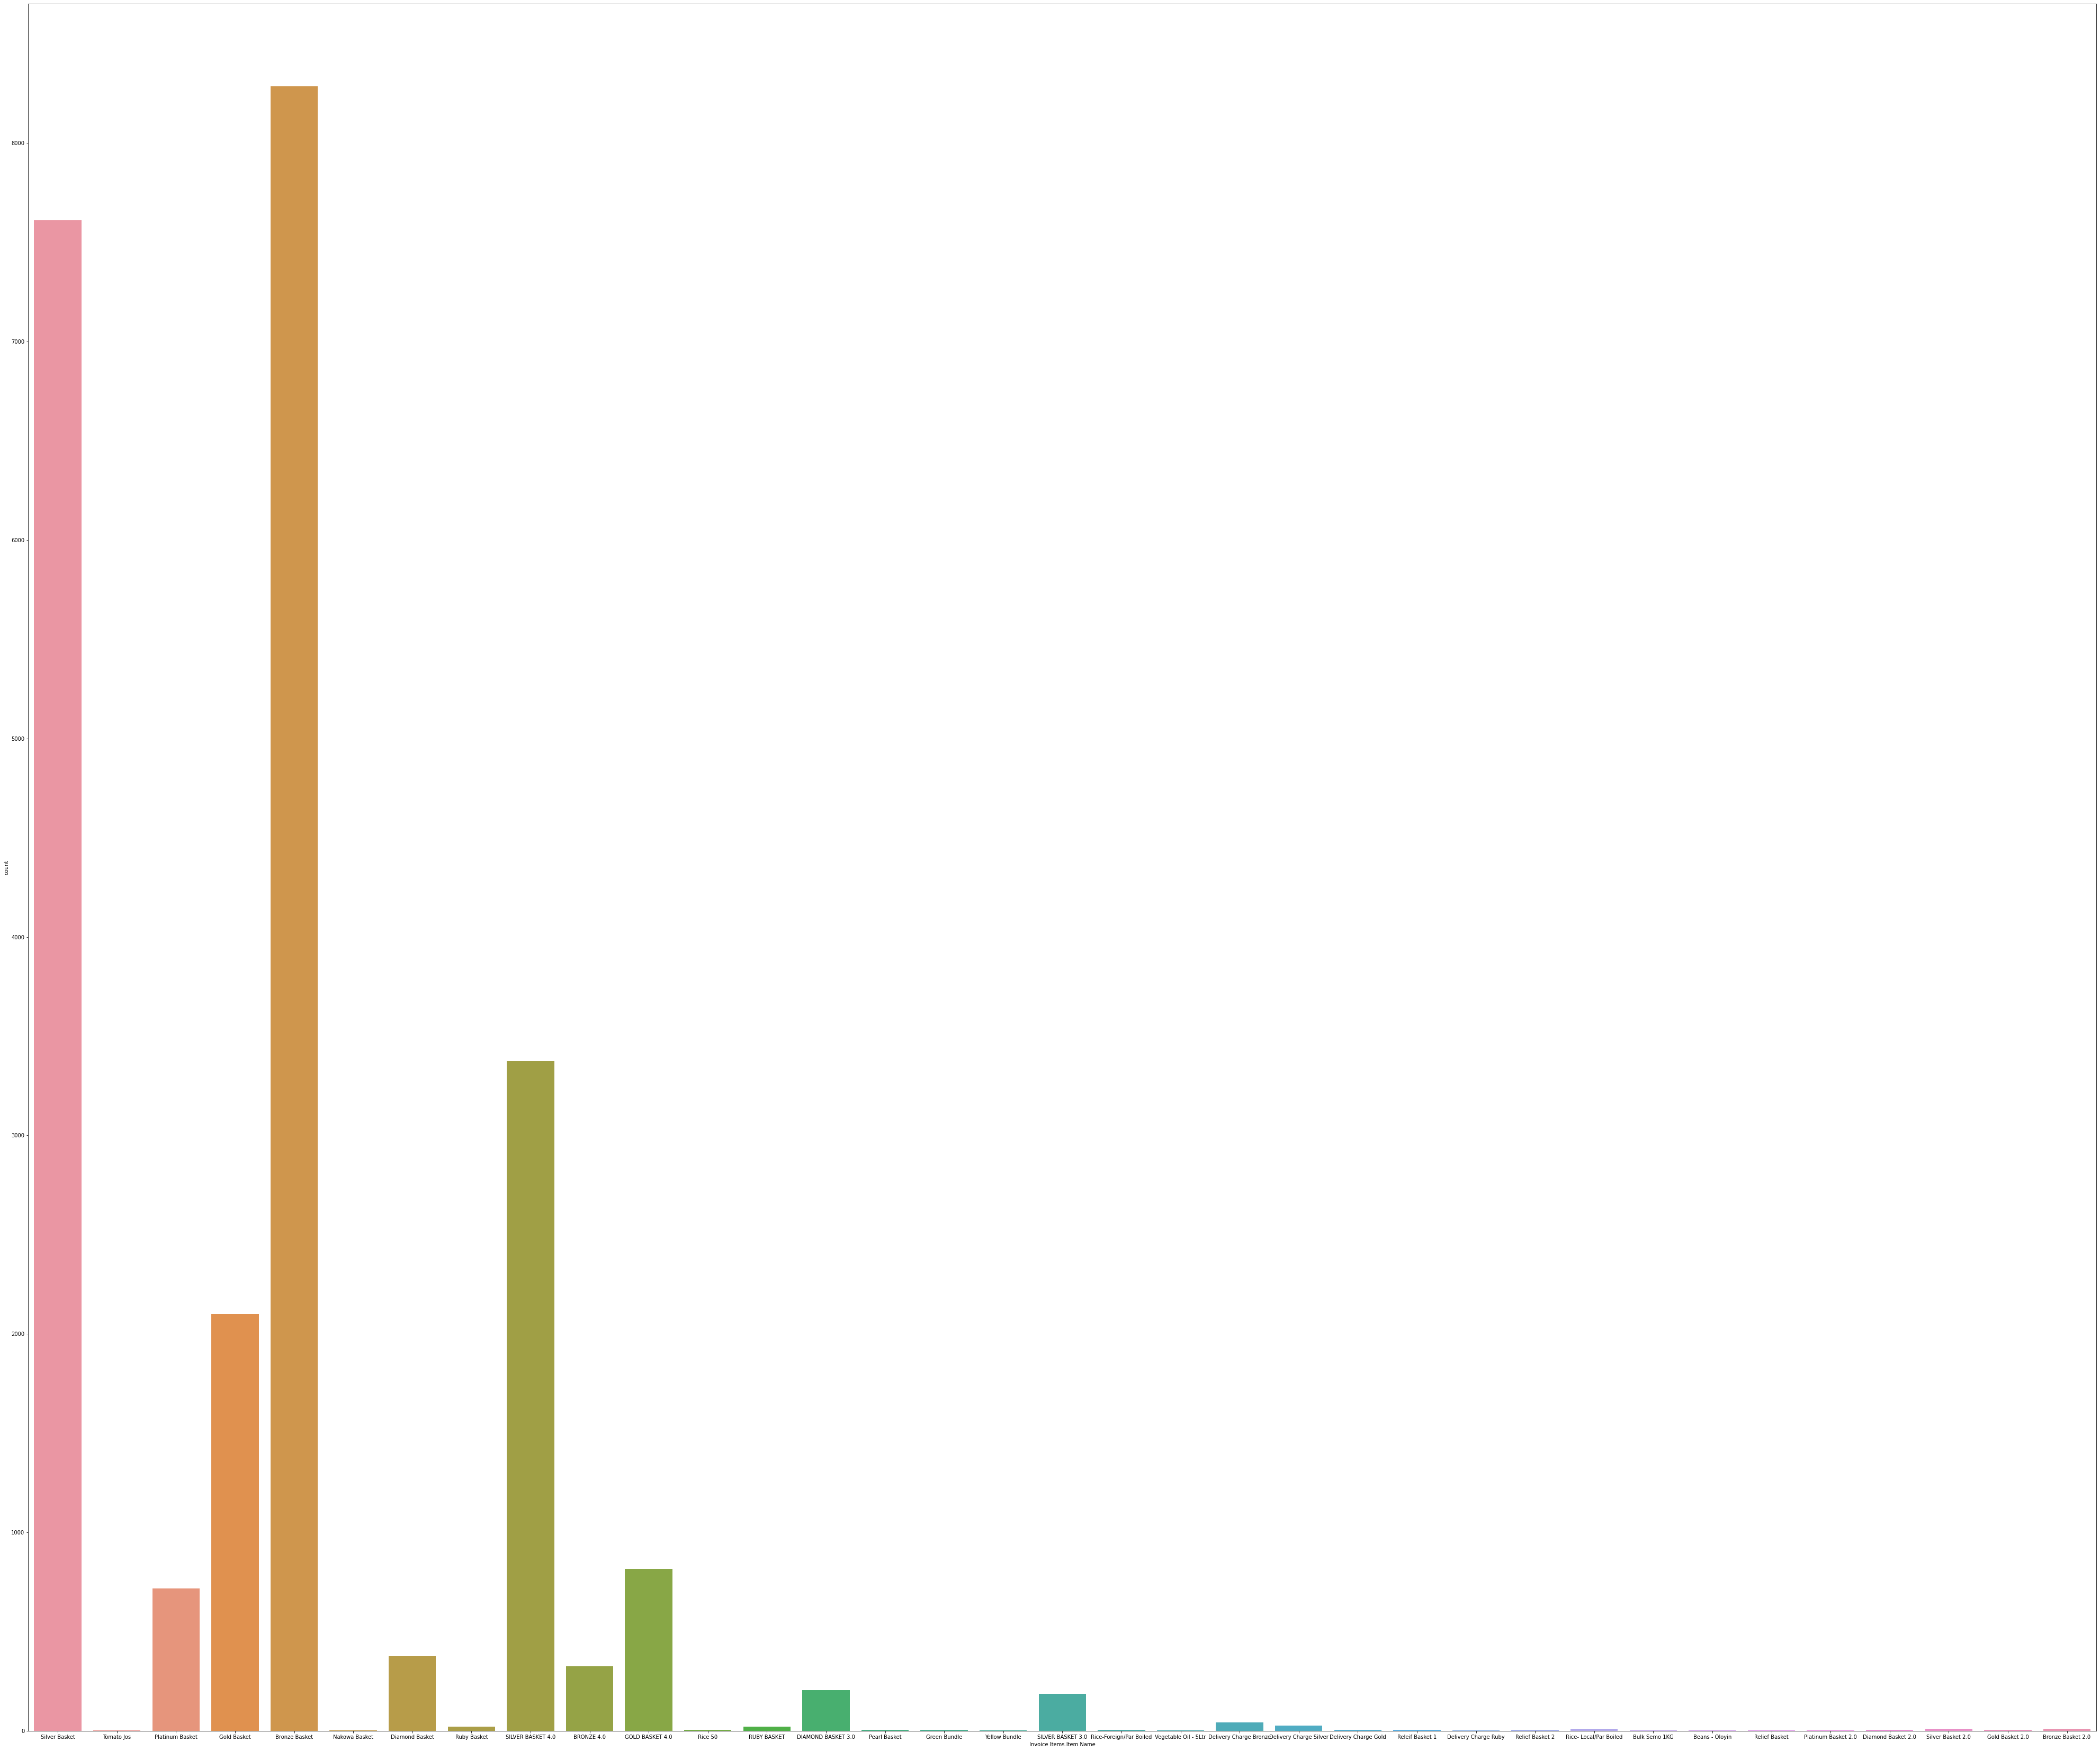

In [117]:
#Let's visualize the data in bars ,line and see
sns.countplot(x="Invoice Items.Item Name",data=new_data)

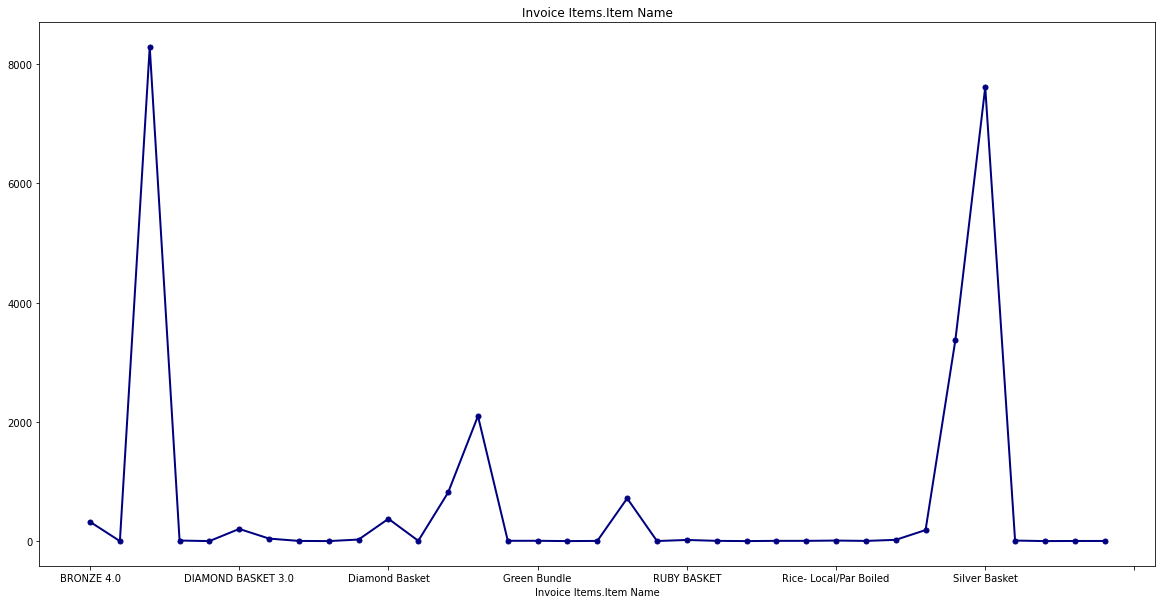

In [118]:
#This is the line graph.
data.groupby('Invoice Items.Item Name')['Invoice Items.Item Name'].count().plot(kind='line',title='Invoice Items.Item Name',figsize=(20,10),lw=2,colormap='jet',marker='.',markersize=10)
#We can see that the bronze basket has the highest customer buying it anongst the items sold followed by Bronze Basket,Silver Basket,SILVER BASKET 4.0,Gold Basket
#The least sold items are Delivery Charge Ruby Bulk Semo 1Kg,Beans - Oloyin,Relief Basket,Nakowa Basket,Tomato Jos    